# Trabajo Integrador Parte 4

Nombre:

Dentro de la carpeta de `data/` vamos a poder encontrar 3 datasets:

- Pokemon (Problema de clasificacion Binaria): La intención es tratar de predecir si basada en la información que tenemos podemos estimar si la carta que estamos viendo es Legendaria o no (Booleano).
- Heart Disease (Problema de clasificacion Binaria): A partir de este dataset vamos a tratar de determinar si una persona basado en ciertos datos tiene asociado una enfermedad cardiaca.
- Challenger USA Space Shuttle O-Ring Data Set (Regresion multivariada): En este dataset encontramos información sobre varios despegues del space shuttle, la intención de este problema es tratar de predecir cuanto será la cantidad de O-Rings que fallan dadas las condiciones de despegue.

> Para la presentación de sus trabajos prácticos **Elijan 1 de los 3 datasets**

# Importar librerías

Importar aquellas librerías que serán utilizadas en el trabajo.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

# Cargar datos

Cargar los datos de entrenamiento.

Recordemos que para todos los datasets tenemos el archivo `columns.csv` que contiene el nombre y descripción de cada columna en el mismo orden que van a encontrar los datos.

En los casos de datos con extensión  `*.data` vamos a tener que leerlo utilizando `pd.read_data('myfile.data', sep = ',', header = 0, names = my_cols)`

De esta manera si quisieramos cargar datos por ejemplo de Nasa deberiamos poner algo asi


```python
## Importing python earlier

my_cols = pd.read_csv('./data/nasa_orings/columns.csv').column.values.tolist()

df_heart = pd.read_csv('./data/nasa_orings/o-ring-erosion-or-blowby.data',
                       delimiter=',',
                       header=0,
                       names = my_cols
                    )
```

In [2]:
DATASET_PATH = "./data/heart_disease/"

In [3]:
cols_heart = pd.read_csv(DATASET_PATH + 'columns.csv').column.values.tolist()

df_heart = pd.read_csv(DATASET_PATH + 'processed.cleveland.data',
                       delimiter=',',
                       header=0,
                       names = cols_heart
                    )

In [4]:
df_heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
298,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
299,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
300,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


# Análisis exploratorio básico y preprocesamiento de los datos

Análisis de los datos para conocer los mismos, ver datos faltantes, decidir cómo tratarlos, ver distribuciones, relaciones, etc. Procesar los datos centrándolos, reescalando, codificando, reduciendo dimensiones, etc. según considere necesario.

Vamos a considerar:

- Para escalar datos: `sklearn.preprocessing.StandardScaler()`
- Para completar valores nulos: `sklearn.impute.SimpleImputer()` [Quickguide](https://scikit-learn.org/stable/modules/impute.html)
- Para reduccion de dimensiones (sobre todo para visualizar los datos): PCA o [T-SNE](https://builtin.com/data-science/tsne-python) (Solo para visualización)
- Para codificar variables categóricas: `sklearn.preprocessing.OneHotEncoder()`

In [5]:
df_heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.410596,0.678808,3.165563,131.645695,246.738411,0.145695,0.986755,149.605960,0.327815,1.035430,1.596026,0.940397
std,9.040163,0.467709,0.953612,17.612202,51.856829,0.353386,0.994916,22.912959,0.470196,1.160723,0.611939,1.229384
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000
50%,55.500000,1.000000,3.000000,130.000000,241.500000,0.000000,0.500000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [6]:
numerical_features = ["age", "trestbps", "chol", "thalach", "oldpeak", "thalach"]
categorical_features = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]
target = "num"

Una vez separadas las variables por tipo, podemos empezar el analisis. Lo primero es binarizar a la variable target.

In [7]:
df_heart[target].value_counts()

num
0    163
1     55
2     36
3     35
4     13
Name: count, dtype: int64

In [8]:
y = df_heart[target].values

In [9]:
sano_mask = y == 0
enfermo_mask = y > 0

y_class = y.copy()

y_class[sano_mask] = 0
y_class[enfermo_mask] = 1

In [10]:
df_heart["num"] = y_class

In [11]:
pd.get_dummies(df_heart[categorical_features])

,sex,cp,fbs,restecg,exang,slope,ca_0.0,ca_1.0,ca_2.0,ca_3.0,ca_?,thal_3.0,thal_6.0,thal_7.0,thal_?
0,1.0,4.0,0.0,2.0,1.0,2.0,False,False,False,True,False,True,False,False,False
1,1.0,4.0,0.0,2.0,1.0,2.0,False,False,True,False,False,False,False,True,False
2,1.0,3.0,0.0,0.0,0.0,3.0,True,False,False,False,False,True,False,False,False
3,0.0,2.0,0.0,2.0,0.0,1.0,True,False,False,False,False,True,False,False,False
4,1.0,2.0,0.0,0.0,0.0,1.0,True,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,1.0,1.0,0.0,0.0,0.0,2.0,True,False,False,False,False,False,False,True,False
298,1.0,4.0,1.0,0.0,0.0,2.0,False,False,True,False,False,False,False,True,False
299,1.0,4.0,0.0,0.0,1.0,2.0,False,True,False,False,False,False,False,True,False
300,0.0,2.0,0.0,2.0,0.0,2.0,False,True,False,False,False,True,False,False,False


In [12]:
X_numerical = df_heart[numerical_features]

scaler = StandardScaler()
X_numerical_scaled = scaler.fit_transform(X_numerical)

pca = PCA(n_components=0.9)
X_numerical_scaled_pca = pca.fit_transform(X_numerical_scaled)
X_numerical_scaled_pca.shape

(302, 4)

In [13]:
sum(pca.explained_variance_ratio_)

0.9070664632570435

Puede observarse que necesitamos 4 PCs para explicar el 90% de la varianza de las columnas numéricas en el dataset.

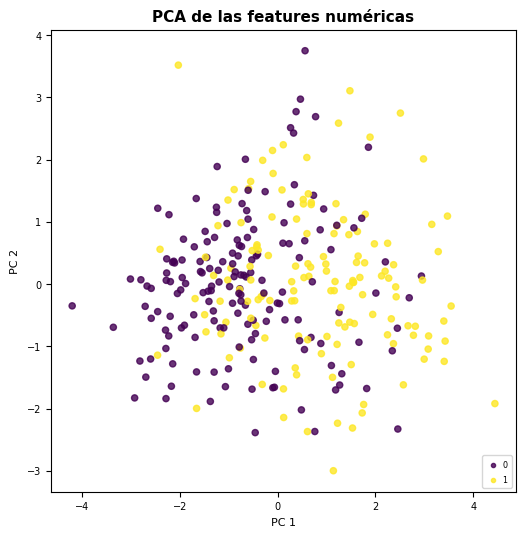

In [14]:
plt.figure(figsize=(6,6))

scatter = plt.scatter(X_numerical_scaled_pca[:, 0], X_numerical_scaled_pca[:, 1], c=y_class, cmap="viridis", alpha=0.8, s=20)

plt.xlabel("PC 1", fontsize=8)
plt.ylabel("PC 2", rotation=90, labelpad=5, fontsize=8)

plt.title(
    f"PCA de las features numéricas",
    fontsize=11,
    fontweight="bold",
)

plt.xticks(fontsize=7)
plt.yticks(fontsize=7)

plt.legend(
    handles=scatter.legend_elements()[0],
    labels=scatter.legend_elements()[1],
    fontsize="xx-small",
    loc="lower right",
    markerscale=0.5,
    handletextpad=0.1,
)

plt.show()

Graficar el PCA (explicativo del 90% de la varianza) de las features numéricas nos permite entender que éstas no son suficiente para separar claramente ambos grupos (con o sin enfermedad cardíaca). Indudablemente son útiles, puesto que hay una tendencia en la clase positiva a tener un mayor valor de PC1 y PC2 respecto a la clase negativa. Pero aún así, el solapamiento entre ambas clases es considerable. Por suerte tenemos las variables categoricas para incorporar al modelo.

#### Verificación de valores nulos

In [15]:
df_heart.isna().any().any()

False

Pareciera que no tenemos valores nulos en el dataset.

In [16]:
for column in df_heart.columns:
    print(column, ": ", df_heart[column].dtype)

age :  float64
sex :  float64
cp :  float64
trestbps :  float64
chol :  float64
fbs :  float64
restecg :  float64
thalach :  float64
exang :  float64
oldpeak :  float64
slope :  float64
ca :  object
thal :  object
num :  int64


Encontramos que dos columnas no son numéricas. Esto puede traer aparejado numerosos problemas. Buscamos transformarlas en numéricas.

In [17]:
df_heart["thal"].value_counts()

thal
3.0    166
7.0    117
6.0     17
?        2
Name: count, dtype: int64

In [18]:
df_heart["ca"].value_counts()

ca
0.0    175
1.0     65
2.0     38
3.0     20
?        4
Name: count, dtype: int64

Entendemos la razón. Aparentemente los valores nulos en la base de datos están definidos con un signo de interrogación. Por esto, al cargar el dataset, Python lee esas columnas como columnas de tipo string. Vamos a resolver esos valores.

In [19]:
df_heart["thal"] = pd.to_numeric(df_heart["thal"], errors="coerce")
df_heart["ca"] = pd.to_numeric(df_heart["ca"], errors="coerce")

# Modelos y evaluación
Probar diferentes modelos para predecir la variable objetivo. Calcular las métricas que considere relevantes. Comentar los resultados. 

In [20]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [21]:
import seaborn as sn

def print_cm(cm):
    df_cm = pd.DataFrame(cm, index=['Negative', 'Positive'], columns=['Negative', 'Positive'])

    # Plot the heatmap
    plt.figure(figsize=(4,4))
    sn.heatmap(df_cm, annot=True, fmt='d', cmap='Oranges', cbar=False)

    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    return

In [22]:
list_results = []

# Separamos en X, y.
X, y = df_heart.drop(columns="num").values, df_heart["num"].values

imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

#### Logistic Regression

Arrancamos por el modelo de Regression Logística con búsqueda automática de hyperparametros.


In [23]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr_clf = LogisticRegressionCV()
lr_clf.fit(X_train_scaled, y_train)

lr_y_pred = lr_clf.predict(X_test_scaled)

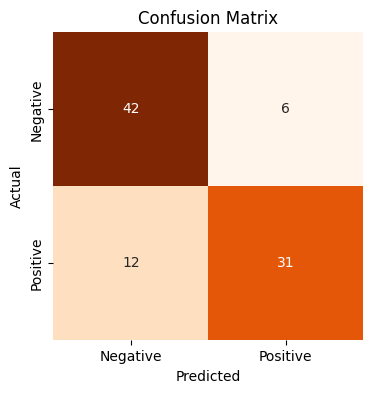

In [24]:
print_cm(confusion_matrix(y_test, lr_y_pred))

In [25]:
accuracy = accuracy_score(y_test, lr_y_pred)
print(f"Accuracy: {accuracy:.4f}")

precision = precision_score(y_test, lr_y_pred)
print(f"Precision: {precision:.4f}")

recall = recall_score(y_test, lr_y_pred)
print(f"Recall: {recall:.4f}")

list_results.append(
    {
        "model": "Logistic Regression",
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
    }
)

Accuracy: 0.8022
Precision: 0.8378
Recall: 0.7209


Se observa que el Recall es considerablemente bajo, es decir que hay una buena parte de positivos (con problemas de corazón) que no están siendo detectados por el algoritmo. Esto es potencialmente peligroso, ya que en caso de no detectar a tiempo ciertas enfermedades pueden surgir complicaciones.

Vamos a probar más adelante con nuevos modelos, pero primero vamos a intentar utilizar las probabilidades predichas por la regresión logística para, cambiando el threshold, diminuir la precisión y aumentar el recall. Esto ya que es mejor pensar que una persona tiene una enfermedad que no tiene, antes que no identificar a una persona que si la tiene.

In [26]:
lr_y_pred_proba = lr_clf.predict_proba(X_test_scaled)[:, 1]

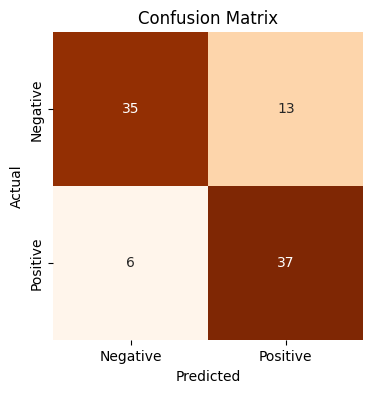

In [27]:
lr_y_pred = (lr_y_pred_proba > .45)
print_cm(confusion_matrix(y_test, lr_y_pred))

In [28]:
accuracy = accuracy_score(y_test, lr_y_pred)
print(f"Accuracy: {accuracy:.4f}")

precision = precision_score(y_test, lr_y_pred)
print(f"Precision: {precision:.4f}")

recall = recall_score(y_test, lr_y_pred)
print(f"Recall: {recall:.4f}")

list_results.append(
    {
        "model": "Logistic Regression (0.45)",
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
    }
)

Accuracy: 0.7912
Precision: 0.7400
Recall: 0.8605


Esta manipulación permite ver el tradeoff entre precision y recall. Al disminuir el threshold para determinar si una predicción es de la clase positiva a 0.45 el algoritmo detecta una mayor cantidad de observaciones como positivas. Esto aumenta el recall (dejar menos positivas sin detectar), pero disminuye considerablemente la precisión (detectar más como positivas de las que en realidad son).

Además observamos que bajando el threshold a 0.45 son varias las observaciones que habían sido predichas como negativas, y que ahora lo son como positivas. Esto significa que numerosas observaciones se encuentran en el límite entre ser predichas como positivas o negativas. Vamos a ver cuántas de las observaciones poseen una probabilidad de clase positiva entre 0.45 y 0.55.

In [29]:
perc_limite = round(np.mean((lr_y_pred_proba > 0.45) & (lr_y_pred_proba < 0.55)), 2)
print(f"Proporción de observaciones con probabilidad comprendida entre 0.45 y 0.55: {perc_limite}")

Proporción de observaciones con probabilidad comprendida entre 0.45 y 0.55: 0.21


#### Support Vector Machine

In [30]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}
svm_grid = GridSearchCV(SVC(), svm_params, cv=5)
svm_grid.fit(X_train_scaled, y_train)

svm_best_model = svm_grid.best_estimator_

svm_y_pred = svm_best_model.predict(X_test_scaled)

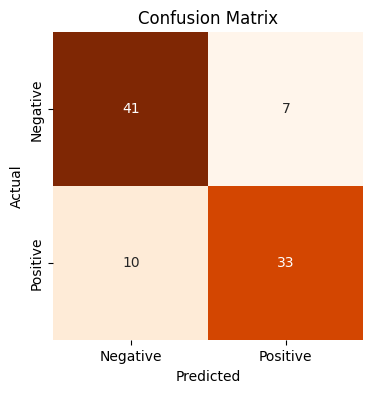

In [31]:
print_cm(confusion_matrix(y_test, svm_y_pred))

In [32]:
accuracy = accuracy_score(y_test, svm_y_pred)
print(f"Accuracy: {accuracy:.4f}")

precision = precision_score(y_test, svm_y_pred)
print(f"Precision: {precision:.4f}")

recall = recall_score(y_test, svm_y_pred)
print(f"Recall: {recall:.4f}")

list_results.append(
    {"model": "SVM", "accuracy": accuracy, "precision": precision, "recall": recall}
)

Accuracy: 0.8132
Precision: 0.8250
Recall: 0.7674


#### Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier

# No scaling needed for Random Forest
rf_params = {
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 4, 5, 10],
    "min_samples_leaf": [1, 2, 5]
}
rf_grid = GridSearchCV(RandomForestClassifier(), rf_params, cv=5)
rf_grid.fit(X_train, y_train)

rf_best_model = rf_grid.best_estimator_

rf_y_pred = rf_best_model.predict(X_test)

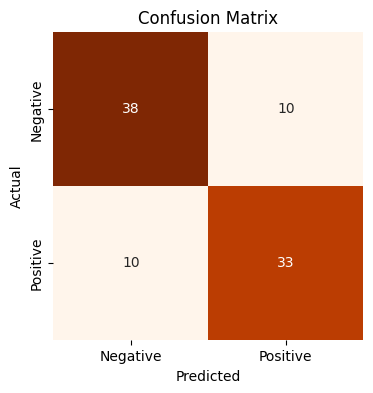

In [34]:
print_cm(confusion_matrix(y_test, rf_y_pred))

In [35]:
accuracy = accuracy_score(y_test, rf_y_pred)
print(f"Accuracy: {accuracy:.4f}")

precision = precision_score(y_test, rf_y_pred)
print(f"Precision: {precision:.4f}")

recall = recall_score(y_test, rf_y_pred)
print(f"Recall: {recall:.4f}")

list_results.append(
    {"model": "Random Forest", "accuracy": accuracy, "precision": precision, "recall": recall}
)

Accuracy: 0.7802
Precision: 0.7674
Recall: 0.7674


#### Hist Gradient Boos Classifier

In [36]:
from sklearn.ensemble import GradientBoostingClassifier

gb_params = {
    "learning_rate": [0.01, 0.03, 0.1, 0.3],
    "max_depth": [3, 5, 7],
    "min_samples_split": [2, 4, 5],
    "min_samples_leaf": [1, 2, 5]
}
gb_grid = GridSearchCV(GradientBoostingClassifier(), gb_params, cv=5)
gb_grid.fit(X_train, y_train)

gb_best_model = gb_grid.best_estimator_

gb_y_pred = gb_best_model.predict(X_test)

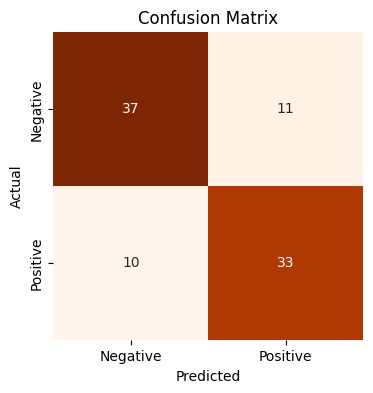

In [37]:
print_cm(confusion_matrix(y_test, gb_y_pred))

In [38]:
accuracy = accuracy_score(y_test, gb_y_pred)
print(f"Accuracy: {accuracy:.4f}")

precision = precision_score(y_test, gb_y_pred)
print(f"Precision: {precision:.4f}")

recall = recall_score(y_test, gb_y_pred)
print(f"Recall: {recall:.4f}")

list_results.append(
    {"model": "Gradient Boost", "accuracy": accuracy, "precision": precision, "recall": recall}
)

Accuracy: 0.7692
Precision: 0.7500
Recall: 0.7674


### Results Analysis

In [39]:
pd.DataFrame(list_results)

,model,accuracy,precision,recall
0,Logistic Regression,0.802198,0.837838,0.720930
1,Logistic Regression (0.45),0.791209,0.740000,0.860465
2,SVM,0.813187,0.825000,0.767442
3,Random Forest,0.780220,0.767442,0.767442
4,Gradient Boost,0.769231,0.750000,0.767442


Como podemos ver, los resultados del problema de clasificación no son muy buenos. La prevalencia de los modelos simples como Logistic Regression o SVM se explica debido a que en un dataset pequeño como el que tenemos son menos suceptibles a overfitting por su simpleza.

Futuros pasos para mejorar la performance de los modelos requerirán una feature engineering mucho más intensa que la practicada para este ejercicio. Probablemente filtrar algunas features que sean no informativas